# **Understand data**

## **1. Chuẩn bị dữ liệu**

In [2]:
# raw data without 2 predict columns
! wget https://github.com/thanggnguyenn/data-for-everything/raw/main/credit_card_churn_20_cols.csv

# raw data on Kaggle
# ! wget https://github.com/thanggnguyenn/data-for-everything/raw/main/credit_card_churn.csv

--2023-04-01 01:31:17--  https://github.com/thanggnguyenn/data-for-everything/raw/main/credit_card_churn_20_cols.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/thanggnguyenn/data-for-everything/main/credit_card_churn_20_cols.csv [following]
--2023-04-01 01:31:18--  https://raw.githubusercontent.com/thanggnguyenn/data-for-everything/main/credit_card_churn_20_cols.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1254688 (1.2M) [text/plain]
Saving to: ‘credit_card_churn_20_cols.csv’

credit_card_churn_2 100%[===================>]   1.20M  --.-KB/s    in 0.05s   

2023-04-01 01:31:18 (22.3 M

## **2. Thư viện**

In [26]:
!pip install minepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.0/497.0 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minepy: filename=minepy-1.2.6-cp39-cp39-linux_x86_64.whl size=226935 sha256=a7fcb32a165f31b48c475050f3e30e2275e6f7e77cc6b0fe7fe32f766be09b0e
  Stored in directory: /root/.cache/pip/wheels/36/71/63/ac6efc0d0f43ad93398a7b25b6ef3b3aacf109e7dc5afe588f
Successfully built minepy


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
from minepy import MINE

## **3. Tải dữ liệu**

In [ ]:
raw_data = pd.read_csv("credit_card_churn.csv",index_col="CLIENTNUM")
raw_data.head()

In [ ]:
raw_data.shape

Dữ liệu có 10127 dòng và 22 cột.

## **4. Tổng quan về dữ liệu** 

### **Mô tả bộ dữ liệu**

1. CLIENTNUM: số định danh khách hàng có tài khoản tại ngân hàng. 

2. Attrition_Flag: Hoạt động của khách hàng. Gồm hai giá trị là: Existing Customer (khách hàng đang hoạt động) và Attrited Customer (khách hàng đã ngưng sử dụng dịch vụ). 

3. Customer_Age: tuổi của khách hàng. 

4. Gender: giới tính 

5. Dependent_count: số người phụ thuộc. 

6. Education_Level: trình độ học vấn. 

7. Marital_Status: tình trạng hôn nhân. 

8. Income_Category: phân loại mức thu nhập (gồm có: dưới \$40K, \$40K – \$60K, \$60K - \$80K, \$80K - \$120K, trên \$129K và không biết).  

9. Card_Category: loại thẻ tín dụng (Blue, Silver, Gold, Platinum). 

10. Months_on_book: thời gian có giao dịch với ngân hàng. 

11. Total_Relationship_Count: số lượng toàn bộ sản phẩm mà khách hàng đã sử dụng. 

12. Months_Inactive_12_mon: số tháng không giao dịch trong 12 tháng gần nhất. 

13. Contacts_Count_12_mon: số liên lạc trong 12 tháng gần nhất. 

14. Credit_Limit: hạn mức tín dụng trên thẻ tín dụng. 

15. Total_Revolving_Bal: tổng số dư quay vòng trên thẻ tín dụng.

16. Avg_Open_To_Buy: mức hạn tín dụng còn lại (trung bình của 12 tháng gần nhất).

17. Total_Amt_Chng_Q4_Q1: thay đổi trong số tiền giao dịch. 

18. Total_Trans_Amt: tổng số tiền giao dịch (trong 12 tháng gần nhất). 

19. Total_Trans_Ct: tổng số lượng giao dịch (trong 12 tháng gần nhất). 

20. Total_Ct_Chng_Q4_Q1: thay đổi trong số lượng giao dịch. 

21. Avg_Utilization_Ratio: tỷ lệ sử dụng thẻ trung bình. 

22. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: mô hình Naïve Bayes dự đoán khách hàng có ngưng sử dụng dịch vụ dựa trên các yếu tố sau. (không sử dụng cột này). 

23. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: mô hình Naïve Bayes dự đoán khách hàng có ngưng sử dụng dịch vụ dựa trên các yếu tố sau. (không sử dụng cột này). 

**Nhận xét:** chúng ta sẽ xóa hai cột 22 và 23 do không sử dụng hai cột này để xây dựng mô hình. 

In [ ]:
data1 = raw_data.drop(columns=\
["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",\
"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],\
    )
data1.head()

In [ ]:
data1.shape

Sau khi xóa hai cột cuối thì dữ liệu còn 20 thuộc tính.

In [ ]:
# lưu data có 20 cột
# data1.to_csv("credit_card_churn_20_cols.csv")

## **5. Tìm hiểu về dữ liệu**

In [4]:
data = pd.read_csv("credit_card_churn_20_cols.csv",index_col="CLIENTNUM")
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
768805383  Existing Customer            45      M                3   
818770008  Existing Customer            49      F                5   
713982108  Existing Customer            51      M                3   
769911858  Existing Customer            40      F                4   
709106358  Existing Customer            40      M                3   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
768805383     High School        Married     $60K - $80K          Blue   
818770008        Graduate         Single  Less than $40K          Blue   
713982108        Graduate        Married    $80K - $120K          Blue   
769911858     High School        Unknown  Less than $40K          Blue   
709106358      Uneducated        Married     $60K - $80K          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
768805383              39                         5                       1   
818770008              44                         6                       1   
713982108              36                         4                       1   
769911858              34                         3                       4   
709106358              21                         5                       1   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
768805383                      3       12691.0                  777   
818770008                      2        8256.0                  864   
713982108                      0        3418.0                    0   
769911858                      1        3313.0                 2517   
709106358                      0        4716.0                    0   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
768805383          11914.0                 1.335             1144   
818770008           7392.0                 1.541             1291   
713982108           3418.0                 2.594             1887   
769911858            796.0                 1.405             1171   
709106358           4716.0                 2.175              816   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
768805383              42                1.625                  0.061  
818770008              33                3.714                  0.105  
713982108              20                2.333                  0.000  
769911858              20                2.333                  0.760  
709106358              28                2.500                  0.000

### a. Kiểu dữ liệu

Dựa vào phần mô tả dữ liệu, nhóm sẽ chia các thuộc tính thành các kiểu dữ liệu phù hợp:

- Các thuộc tính số: `Customer_Age`, `Dependent_count`, `Months_on_book`, `Total_Relationship_Count`, `Months_Inactive_12_mon`, `Contacts_Count_12_mon`, `Credit_Limit`, `Total_Revolving_Bal`, `Avg_Open_To_Buy`, `Total_Amt_Chng_Q4_Q1`, `Total_Trans_Amt`, `Total_Trans_Ct`, `Total_Ct_Chng_Q4_Q1`, `Avg_Utilization_Ratio`.

- Các thuộc tính phân loại: `Attrition_Flag` (cho biết khách hàng có ngưng sử dụng dịch vụ hay không), `Gender`, `Education_Level`, `Marital_Status`, `Income_Category`, `Card_Category`.

In [5]:
# kiểm tra kiểu dữ liệu của từng cột
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [6]:
# kiểm tra dữ liệu có bị trùng
data.duplicated().sum()

0

Qua kiểm tra nhóm nhận thấy không có dòng nào bị trùng. 

### b. Mô tả thống kê dữ liệu

#### Các cột dữ liệu dạng số (numerical)

In [7]:
num_cols = data.select_dtypes(np.number).columns

##### Thuộc tính sô liên tục

In [8]:
continous_num_cols = [
  'Customer_Age',
  'Credit_Limit',
  'Total_Revolving_Bal',
  'Avg_Open_To_Buy',
  'Total_Amt_Chng_Q4_Q1',
  'Total_Trans_Amt',
  'Total_Trans_Ct',
  'Total_Ct_Chng_Q4_Q1',
  'Avg_Utilization_Ratio'
]

In [9]:
data[continous_num_cols].describe()

Customer_Age  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
count  10127.000000  10127.000000         10127.000000     10127.000000   
mean      46.325960   8631.953698          1162.814061      7469.139637   
std        8.016814   9088.776650           814.987335      9090.685324   
min       26.000000   1438.300000             0.000000         3.000000   
25%       41.000000   2555.000000           359.000000      1324.500000   
50%       46.000000   4549.000000          1276.000000      3474.000000   
75%       52.000000  11067.500000          1784.000000      9859.000000   
max       73.000000  34516.000000          2517.000000     34516.000000   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count          10127.000000     10127.000000    10127.000000   
mean               0.759941      4404.086304       64.858695   
std                0.219207      3397.129254       23.472570   
min                0.000000       510.000000       10.000000   
25%                0.631000      2155.500000       45.000000   
50%                0.736000      3899.000000       67.000000   
75%                0.859000      4741.000000       81.000000   
max                3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

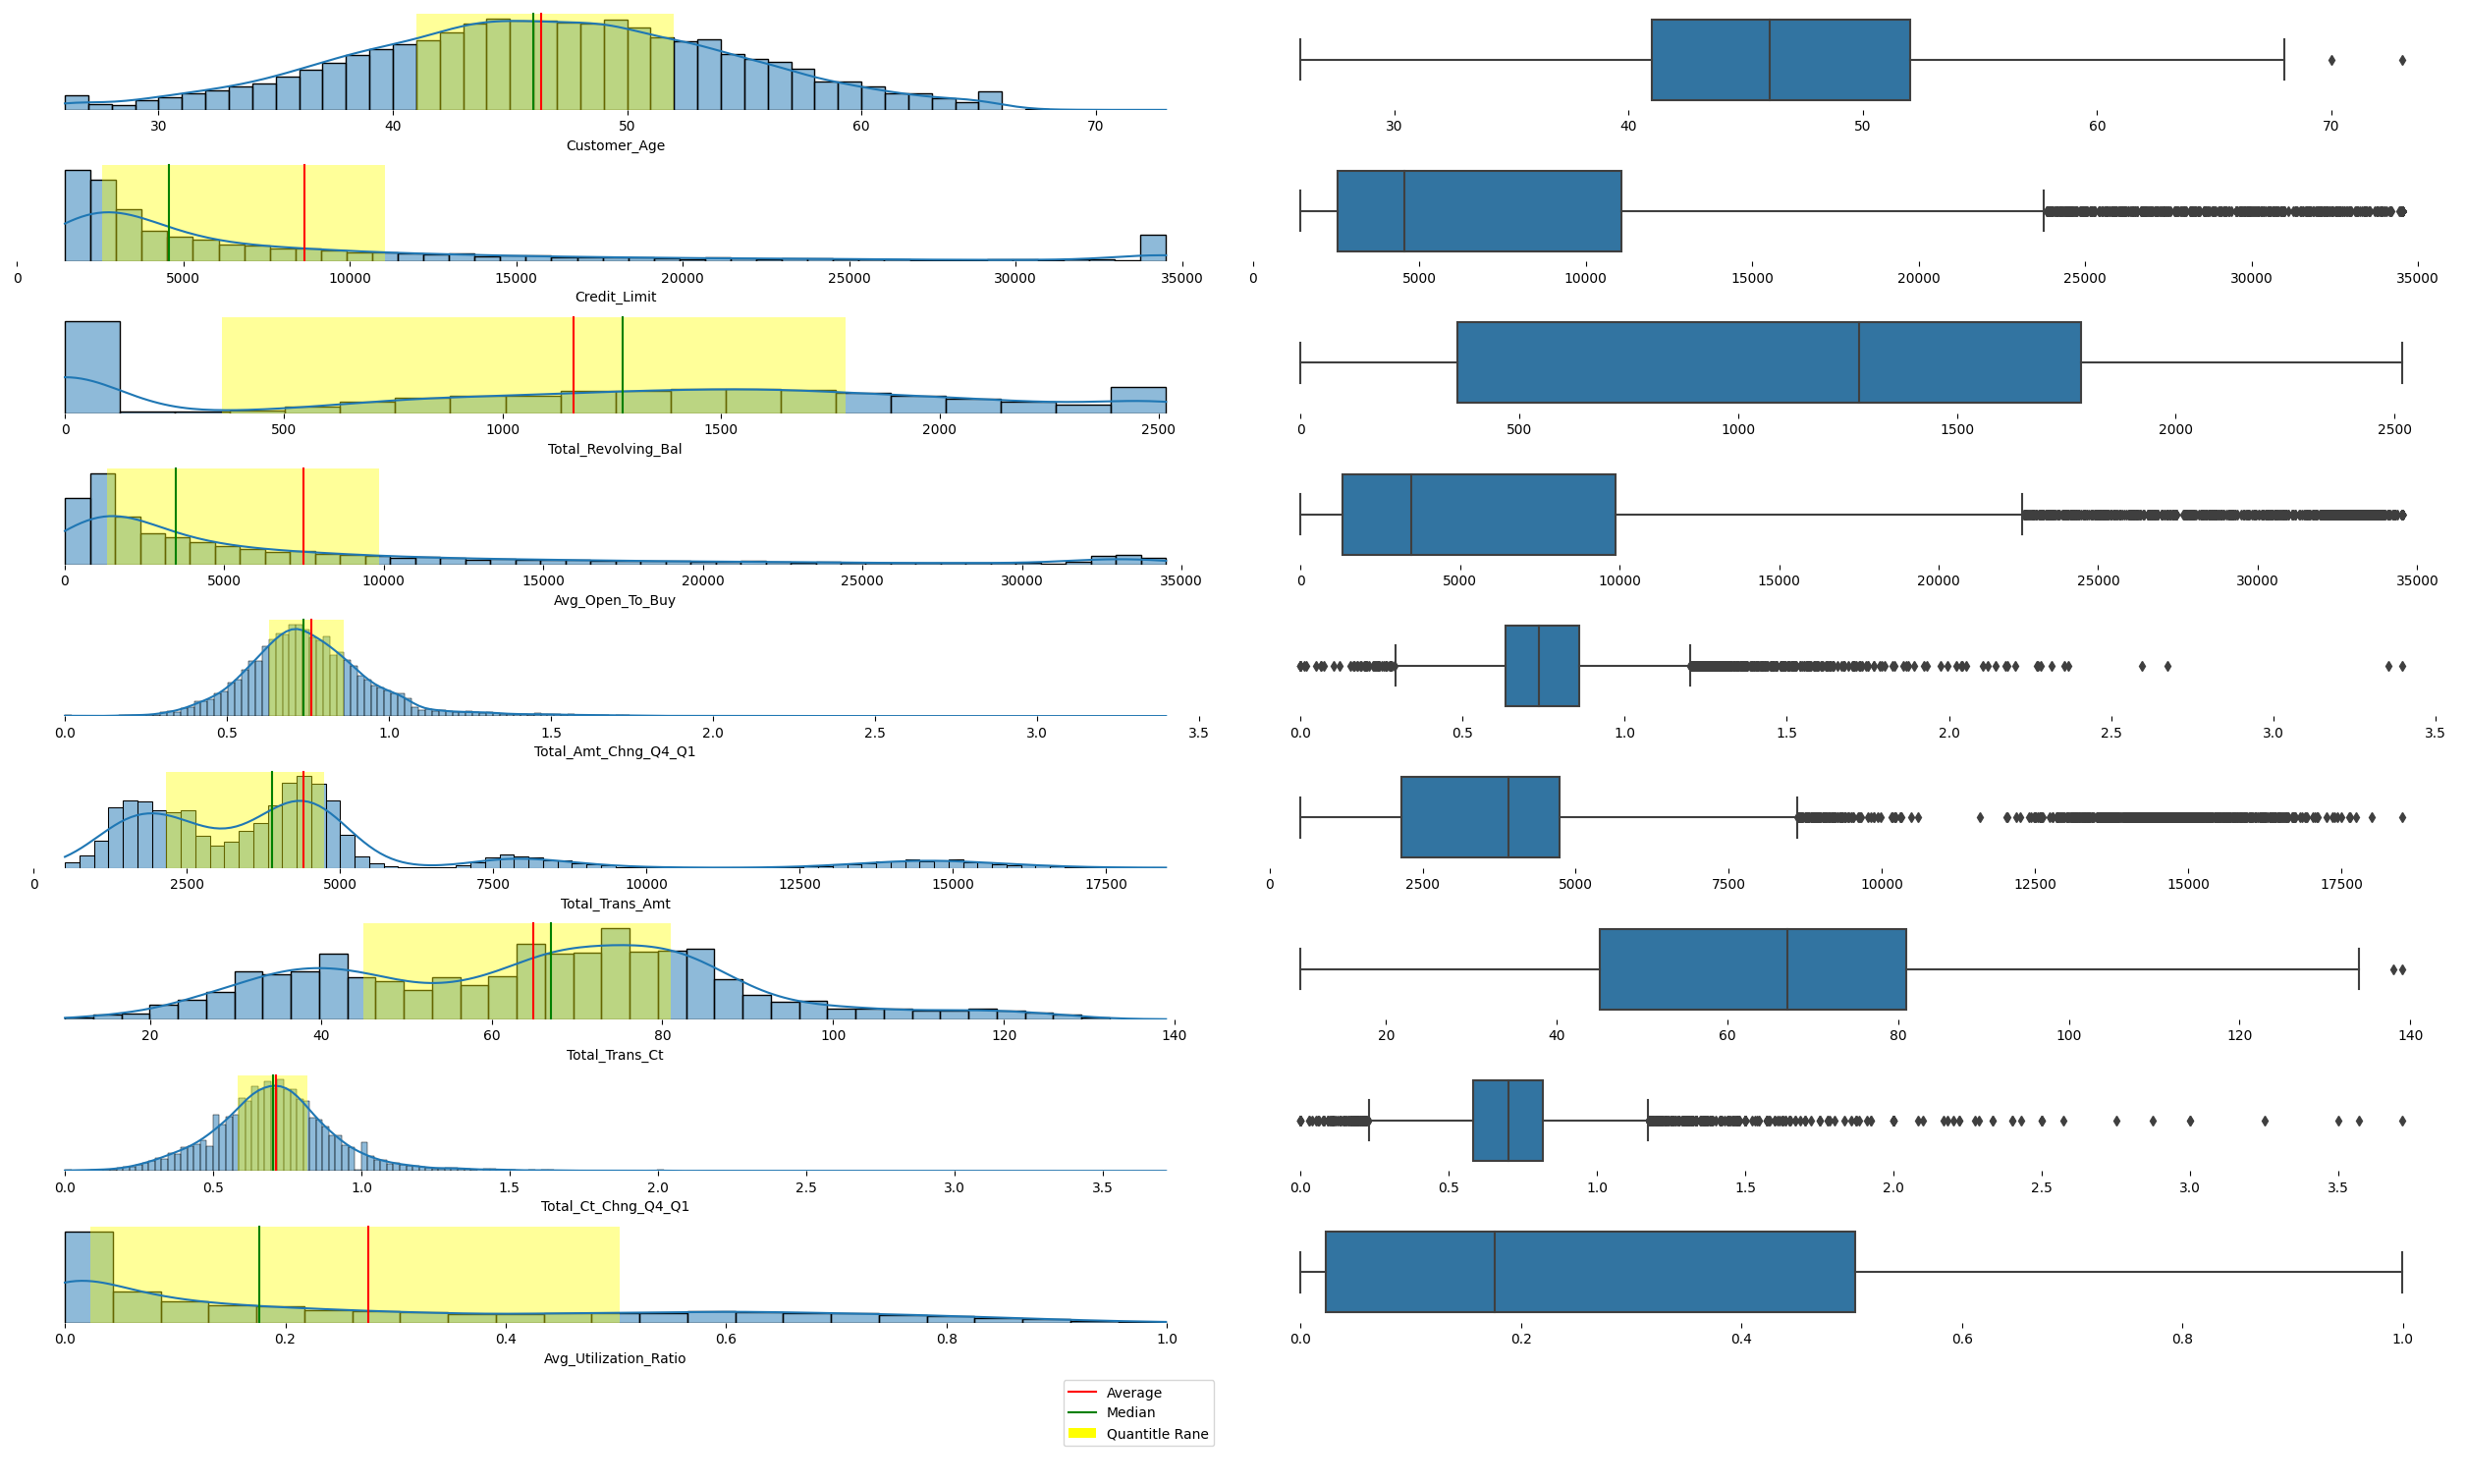

In [10]:
# PLOT HISTOGRAM
nrows = 10
ncols = 2

fig, axes = plt.subplots(nrows, ncols, layout = 'constrained', figsize = (25, 15))
# fig.tight_layout()

index = 0

for i in range(0, nrows - 1):
  for j in range(0, ncols):
    try:
      name = continous_num_cols[index]
      
      if j == 0:
        # Plot histogram
        sns.histplot(data = data[name], ax = axes[i, j], kde = True, bins = 'auto')
        max_ylim = axes[i, j].get_ylim()[1]

        # Plot average line
        avg = data[name].mean()
        axes[i, j].plot([avg]*2, [0, max_ylim], label = 'Average', color = 'red')

        # Plot median line
        med = data[name].median()
        axes[i, j].plot([med]*2, [0, max_ylim], label = 'Median', color = 'green')

        # Plot IQR
        Q1 = np.percentile(data[name], 25)
        Q3 = np.percentile(data[name], 75)

        IQR = Q3 - Q1

        axes[i, j].add_patch(Rectangle((Q1, 0), 
                                        IQR, 
                                        max_ylim,
                                        alpha = 0.4,
                                        facecolor = 'yellow'))
        axes[i, j].set(ylabel = None)

      else:
        sns.boxplot(x = data[name], ax = axes[i, j])
        axes[i, j].set(xlabel = None, ylabel = None)

      # Annotate
      # axes[i, j].set_title(name)
      axes[i, j].spines['top'].set_visible(False)
      axes[i, j].spines['right'].set_visible(False)
      axes[i, j].spines['bottom'].set_visible(False)
      axes[i, j].spines['left'].set_visible(False)
      axes[i, j].set_yticks([], [])

    except:
      break
  index += 1

# PLOT LEGEND
temp = [0]*2
axes[-1, -2].plot(temp, temp, label = 'Average', color = 'red')
axes[-1, -2].plot(temp, temp, label = 'Median', color = 'green')
axes[-1, -2].add_patch(Rectangle((0, 0), 0, 0, facecolor = 'yellow', label = 'Quantitle Rane'))
axes[-1, -2].legend()
axes[-1, -2].set_xticks([], [])
axes[-1, -2].set_yticks([], [])
axes[-1, -2].axis('off')
axes[-1, -1].axis('off')

plt.show()

- **Nhận xét**:
  - Có 2 thuộc tính có phân phối bimodal: `Total_Trans_Ct`, `Total_Trans_Amt`.
  - Có 3 thuộc tính có hình dạng gần phân phối chuẩn: `Customer_Age`, `Total_Ct_Chng_Q4_Q1` và `Total_Amt_Chng_Q4_Q1`. [2]
  - Dựa vào boxplot, có 2 thuộc tính không có outlier: `Total_Revolving_Bal` và `Avg_Utilization_Ratio`.
  - Ngoại trừ 3 thuộc tính ở [2] thì còn lại đều có xu hướng bị lệch.
  - Histogram của `Total_Trans_Amt` cho thấy tệp khách hàng chia thành 4 phân khúc khác nhau. Cũng như với thuộc tính `Total_Trans_Ct`.

##### Thuộc tính sô rời rạc

In [11]:
discrete_num_cols = [
  'Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Months_Inactive_12_mon',
  'Contacts_Count_12_mon'
]

In [33]:
data[discrete_num_cols].describe()

Dependent_count  Months_on_book  Total_Relationship_Count  \
count     10127.000000    10127.000000              10127.000000   
mean          2.346203       35.928409                  3.812580   
std           1.298908        7.986416                  1.554408   
min           0.000000       13.000000                  1.000000   
25%           1.000000       31.000000                  3.000000   
50%           2.000000       36.000000                  4.000000   
75%           3.000000       40.000000                  5.000000   
max           5.000000       56.000000                  6.000000   

       Months_Inactive_12_mon  Contacts_Count_12_mon  
count            10127.000000           10127.000000  
mean                 2.341167               2.455317  
std                  1.010622               1.106225  
min                  0.000000               0.000000  
25%                  2.000000               2.000000  
50%                  2.000000               2.000000  
75%                  3.000000               3.000000  
max                  6.000000               6.000000

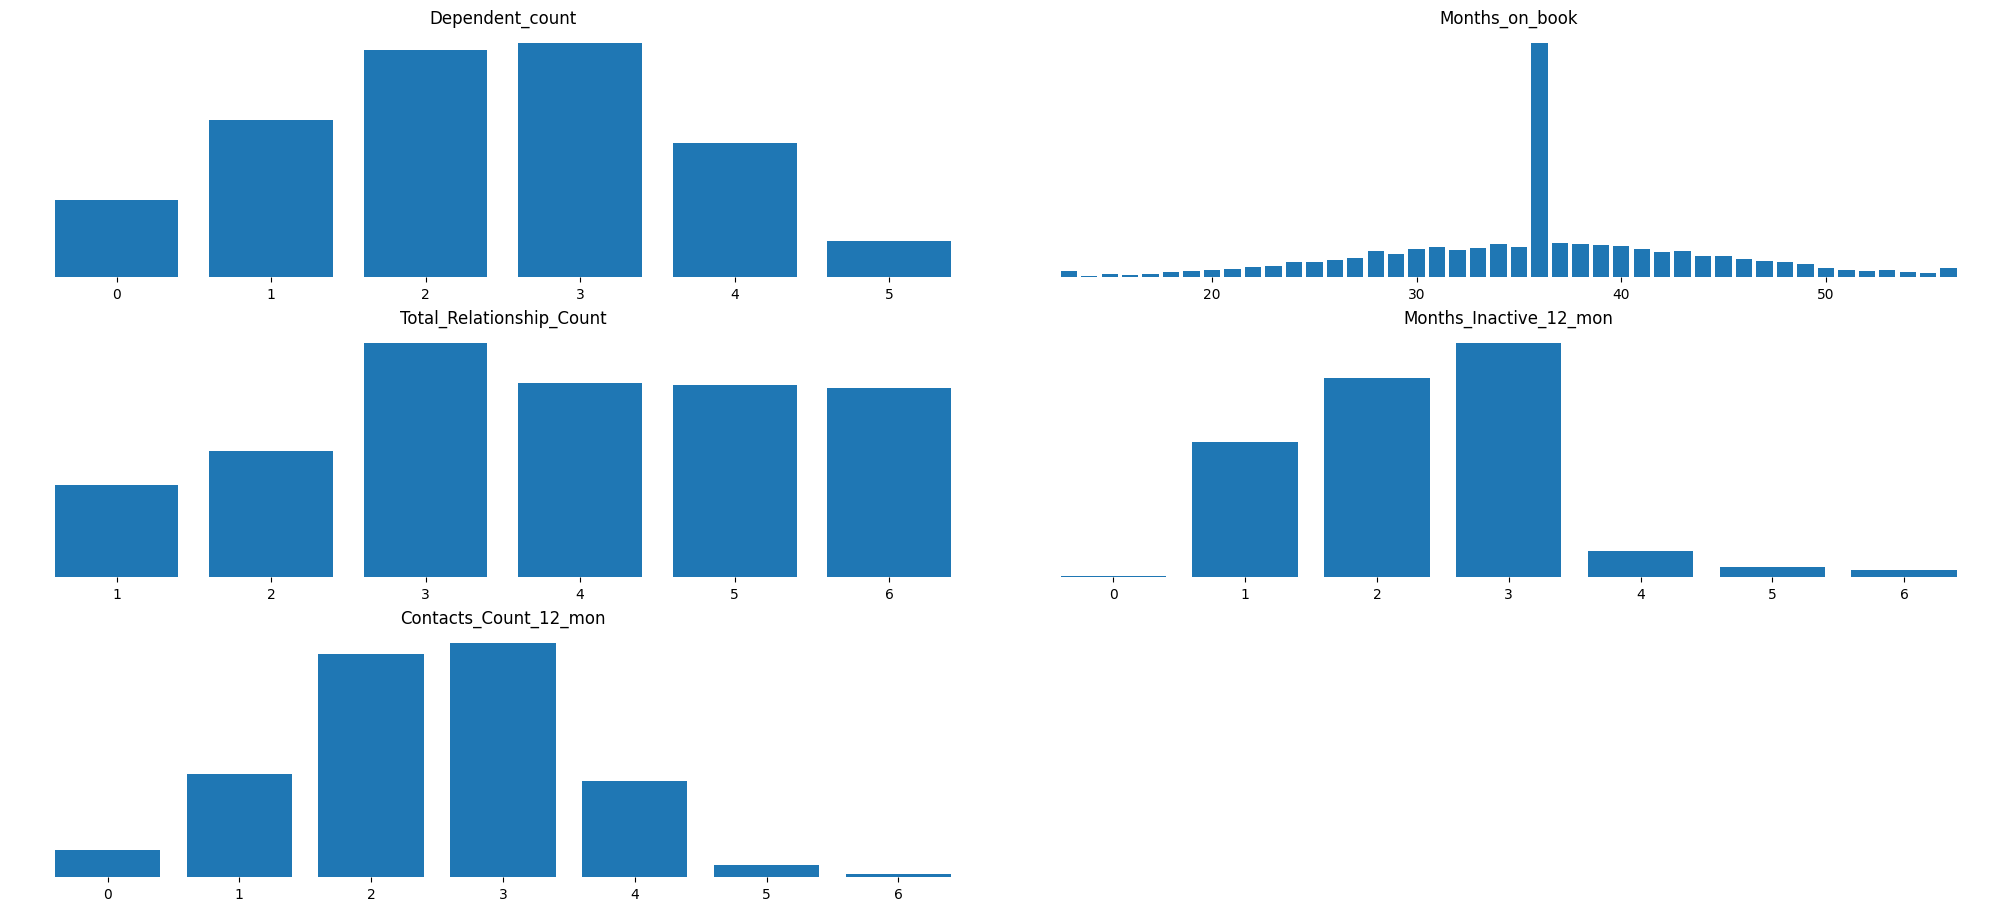

In [12]:
nrows = 3
ncols = 2

fig, axes = plt.subplots(nrows, ncols, layout = 'constrained', figsize = (20, 9))
# fig.tight_layout()

index = 0

for i in range(0, nrows):
  for j in range(0, ncols):
    try:
      name = discrete_num_cols[index]
      
      # Bar plot
      temp = data[name].value_counts()
      axes[i, j].bar(x = temp.index, height = temp.values)

      # Annotate
      axes[i, j].set_title(name)
      axes[i, j].set(ylabel = None)
      axes[i, j].spines['top'].set_visible(False)
      axes[i, j].spines['right'].set_visible(False)
      axes[i, j].spines['bottom'].set_visible(False)
      axes[i, j].spines['left'].set_visible(False)
      axes[i, j].set_yticks([], [])

      index += 1
    except:
      break
  

axes[-1, -1].axis('off')

plt.show()

- **Nhận xét**:
  - Thuộc tính `Months_on_book` có giá trị 36 chiếm đa số hơn so với các giá trị còn lại.
  - Thuộc tính `Months_Inactive_12_mon` có 3 giá trị 1, 2 và 3 xuất hiện nhiều hơn so với các giá trị còn lại.
  - Thuộc tính `Total_Relationship_Count` cho thấy đa phần khách hàng sử dụng từ 3 sản phẩm trở lên của ngân hàng.
  - Thuộc tính `Contacts_Count_12_mon` cho thấy số lượng liên lạc của khách hàng ít (dưới 6 lần).

##### Quan hệ giữa các thuộc tính số với biến Target

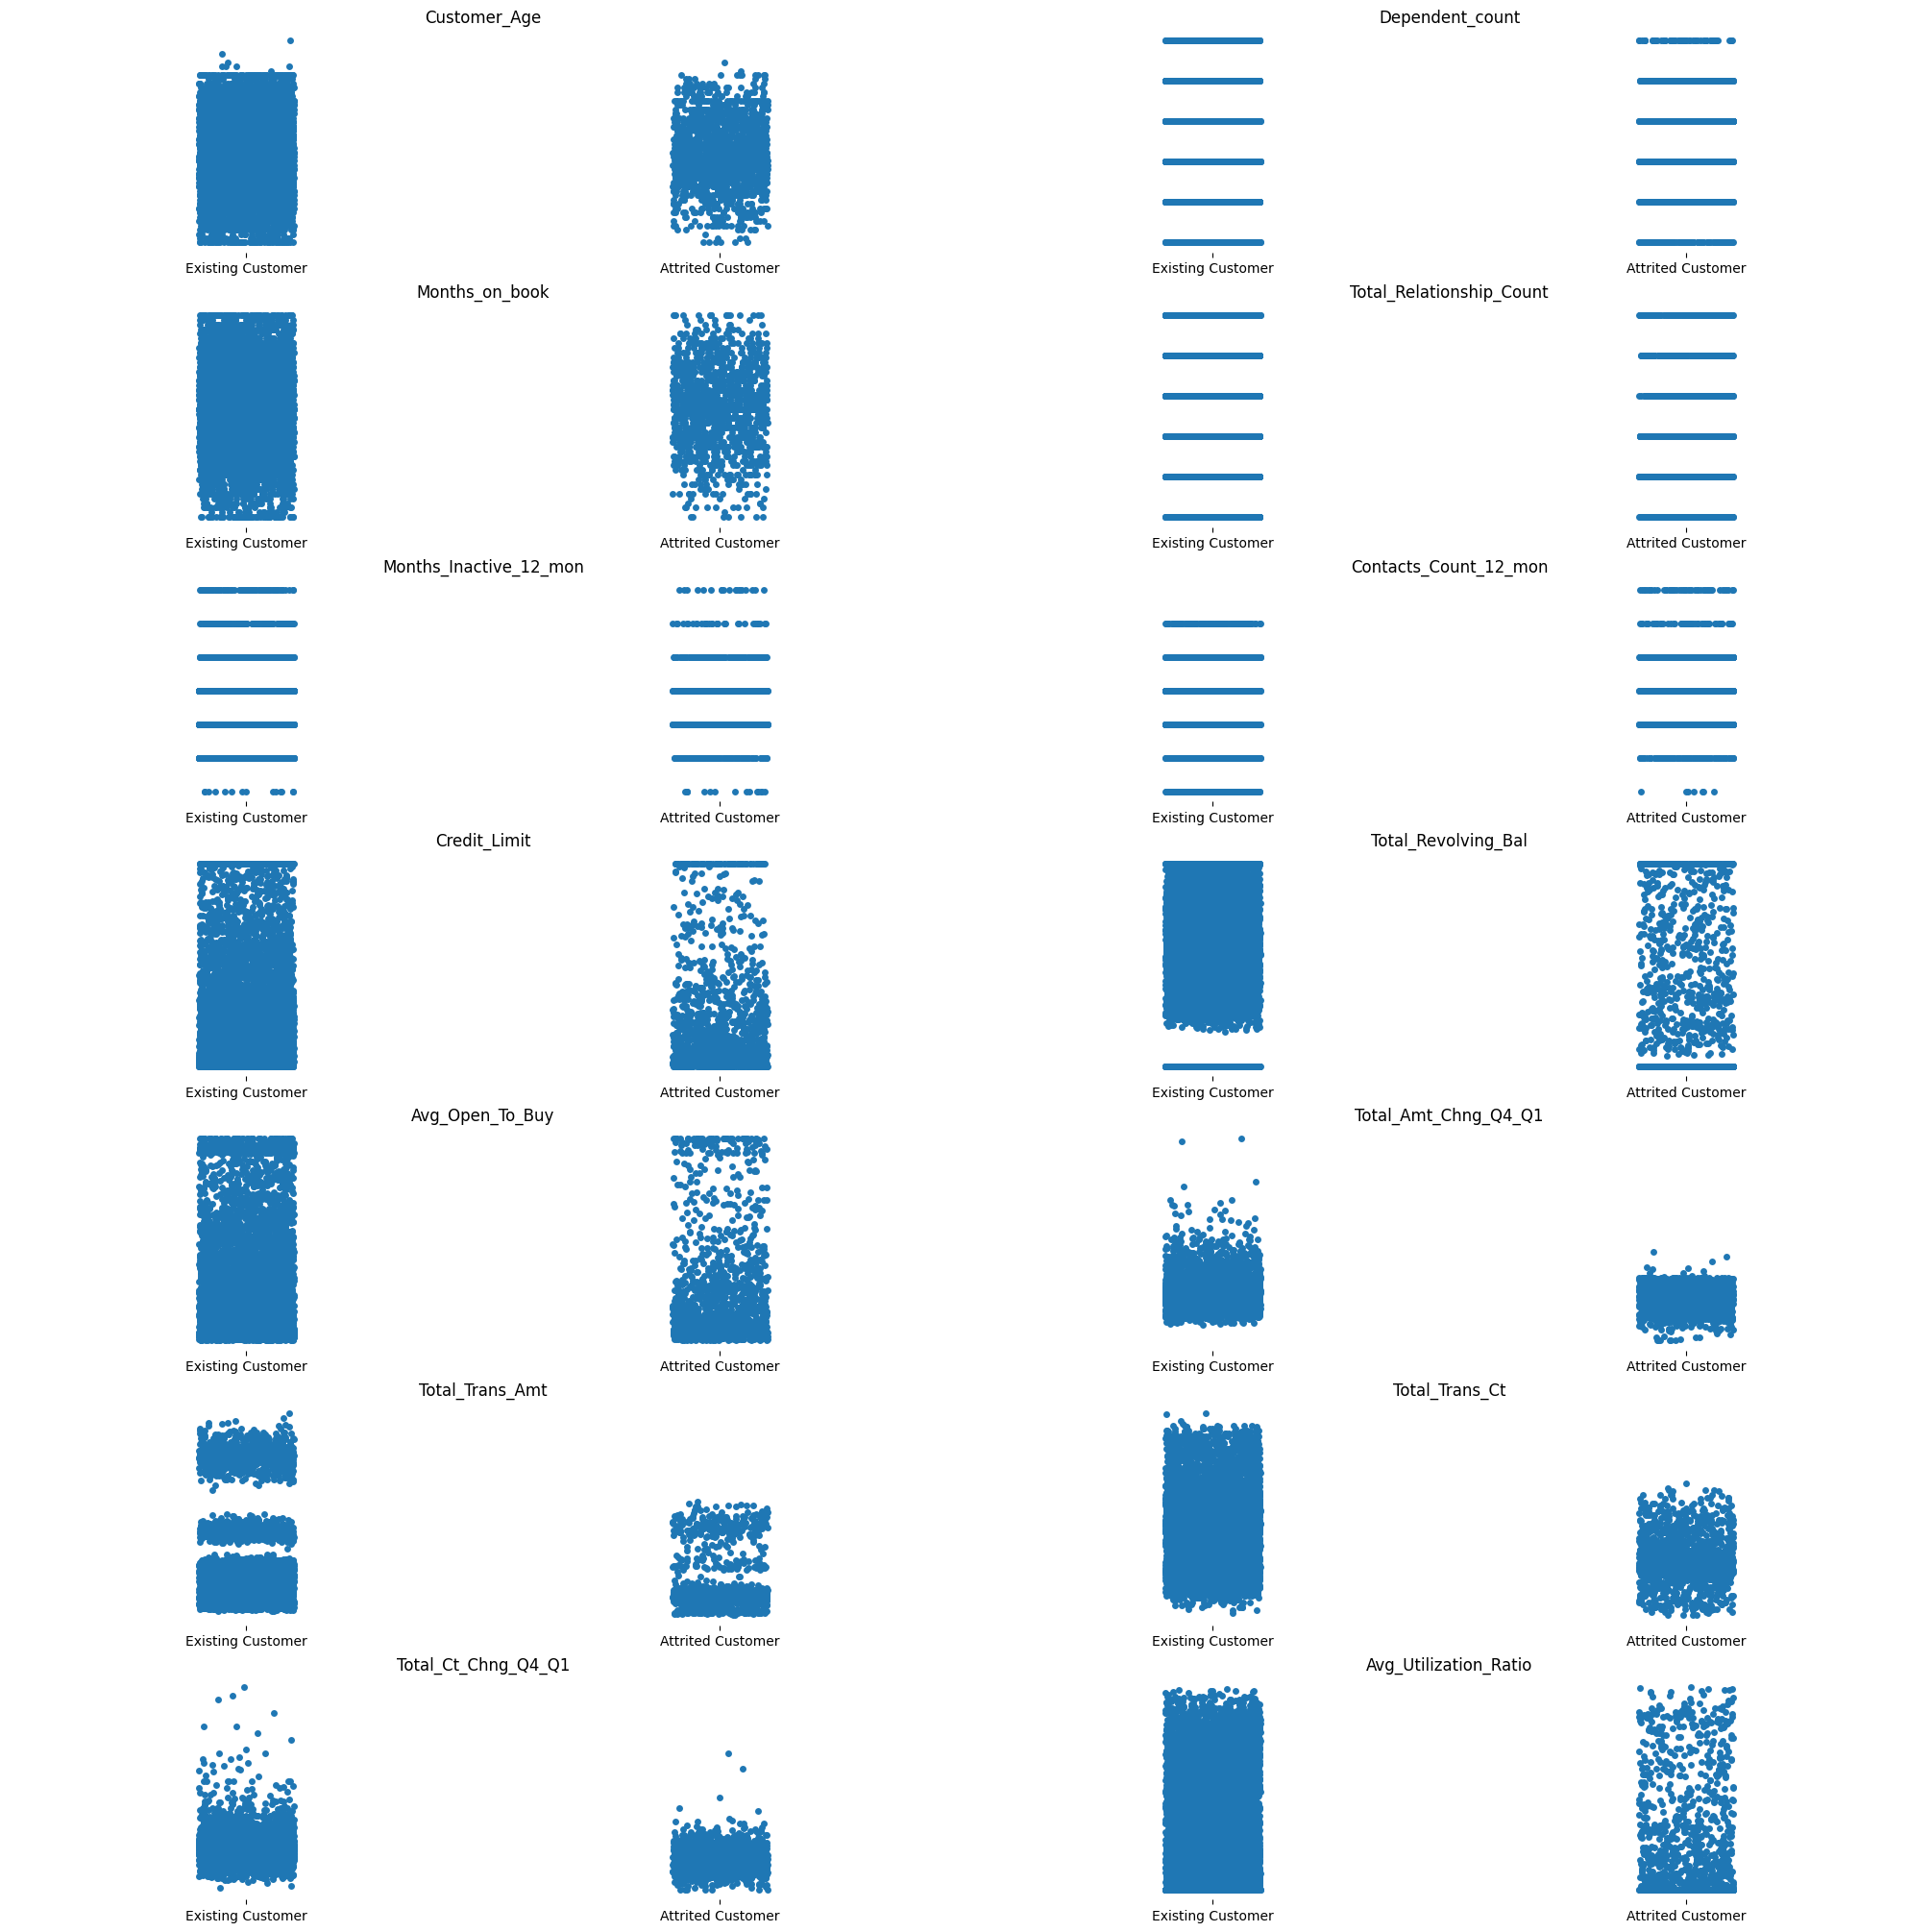

In [21]:
nrows = 7
ncols = 2

fig, axes = plt.subplots(nrows, ncols, layout = 'constrained', figsize = (20, 20))
# fig.tight_layout()

index = 0

for i in range(0, nrows):
  for j in range(0, ncols):
    try:
      name = num_cols[index]
      
      # Bar plot
      sns.stripplot(data = data, x = 'Attrition_Flag', y = name, ax = axes[i, j])

      # Annotate
      axes[i, j].set_title(name)
      axes[i, j].set(xlabel = None, ylabel = None)
      axes[i, j].spines['top'].set_visible(False)
      axes[i, j].spines['right'].set_visible(False)
      axes[i, j].spines['bottom'].set_visible(False)
      axes[i, j].spines['left'].set_visible(False)
      axes[i, j].set_yticks([], [])

      index += 1
    except:
      break
  
plt.show()

- **Nhận xét**:
  - Các outlier thường xuất hiện ở `Existing Customer`.
  - Có những thuộc tính cho ta thấy rõ được sự phân biệt giữa `Existing Customer` và `Attrited Customer` như:
    - `Total_Trans_Amt`.
    - `Total_Amt_Chng_Q4_Q1`.
    - `Total_Trans_Ct`.
  - Biểu đồ của thuộc tính `Total_Trans_Amt` cho thấy:
    - Ở `Existing Customer`, các khách hàng được chia thành 3 nhóm riêng biệt.
    - Trong khi ở `Attrited Customer` cúng đang cho thấy xu hướng tương tự.
    - Tổng giá trị giao dịch của `Attrited Customer` nằm từ mức trung bình trở xuống, còn `Existing Customer` thì có những khách hàng mà tổng giá trị giao dịch nằm ở mức cao AC không có.

##### Tương quan tuyến tính giữa các thuộc tính số

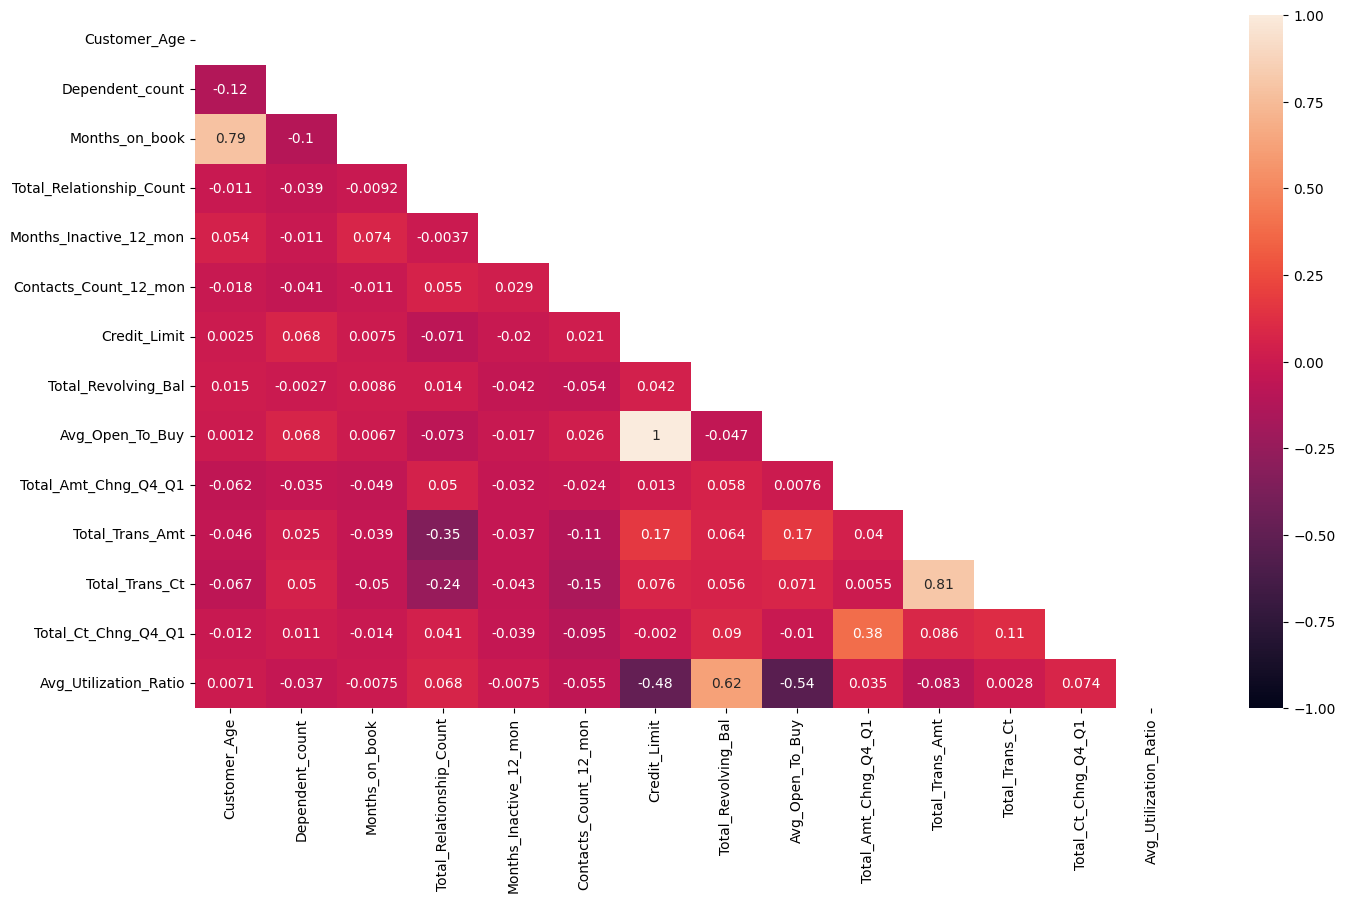

In [22]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(16, 9))

sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, annot = True)

plt.show()

- **Nhận xét**:
  - Tương quan dương:
    - Thuộc tính `Credit_Limit` và `Avg_Open_To_Buy` có hệ số tương quan là 1. Ta có thể xem xét xóa 1 trong 2 thuộc tính này ở bước tiền xử lý.
    - Còn có các cặp thuộc tính khác có tương quan mạnh như `Total_Trans_Ct - Total_Trans_Ct - 0.81` và `Months_on_book - Customer_Age - 0.79`.
  - Tương quan âm:
    - Không có cặp thuộc tính nào có tương quan âm mạnh, giá trị nhỏ nhất là -0.54.

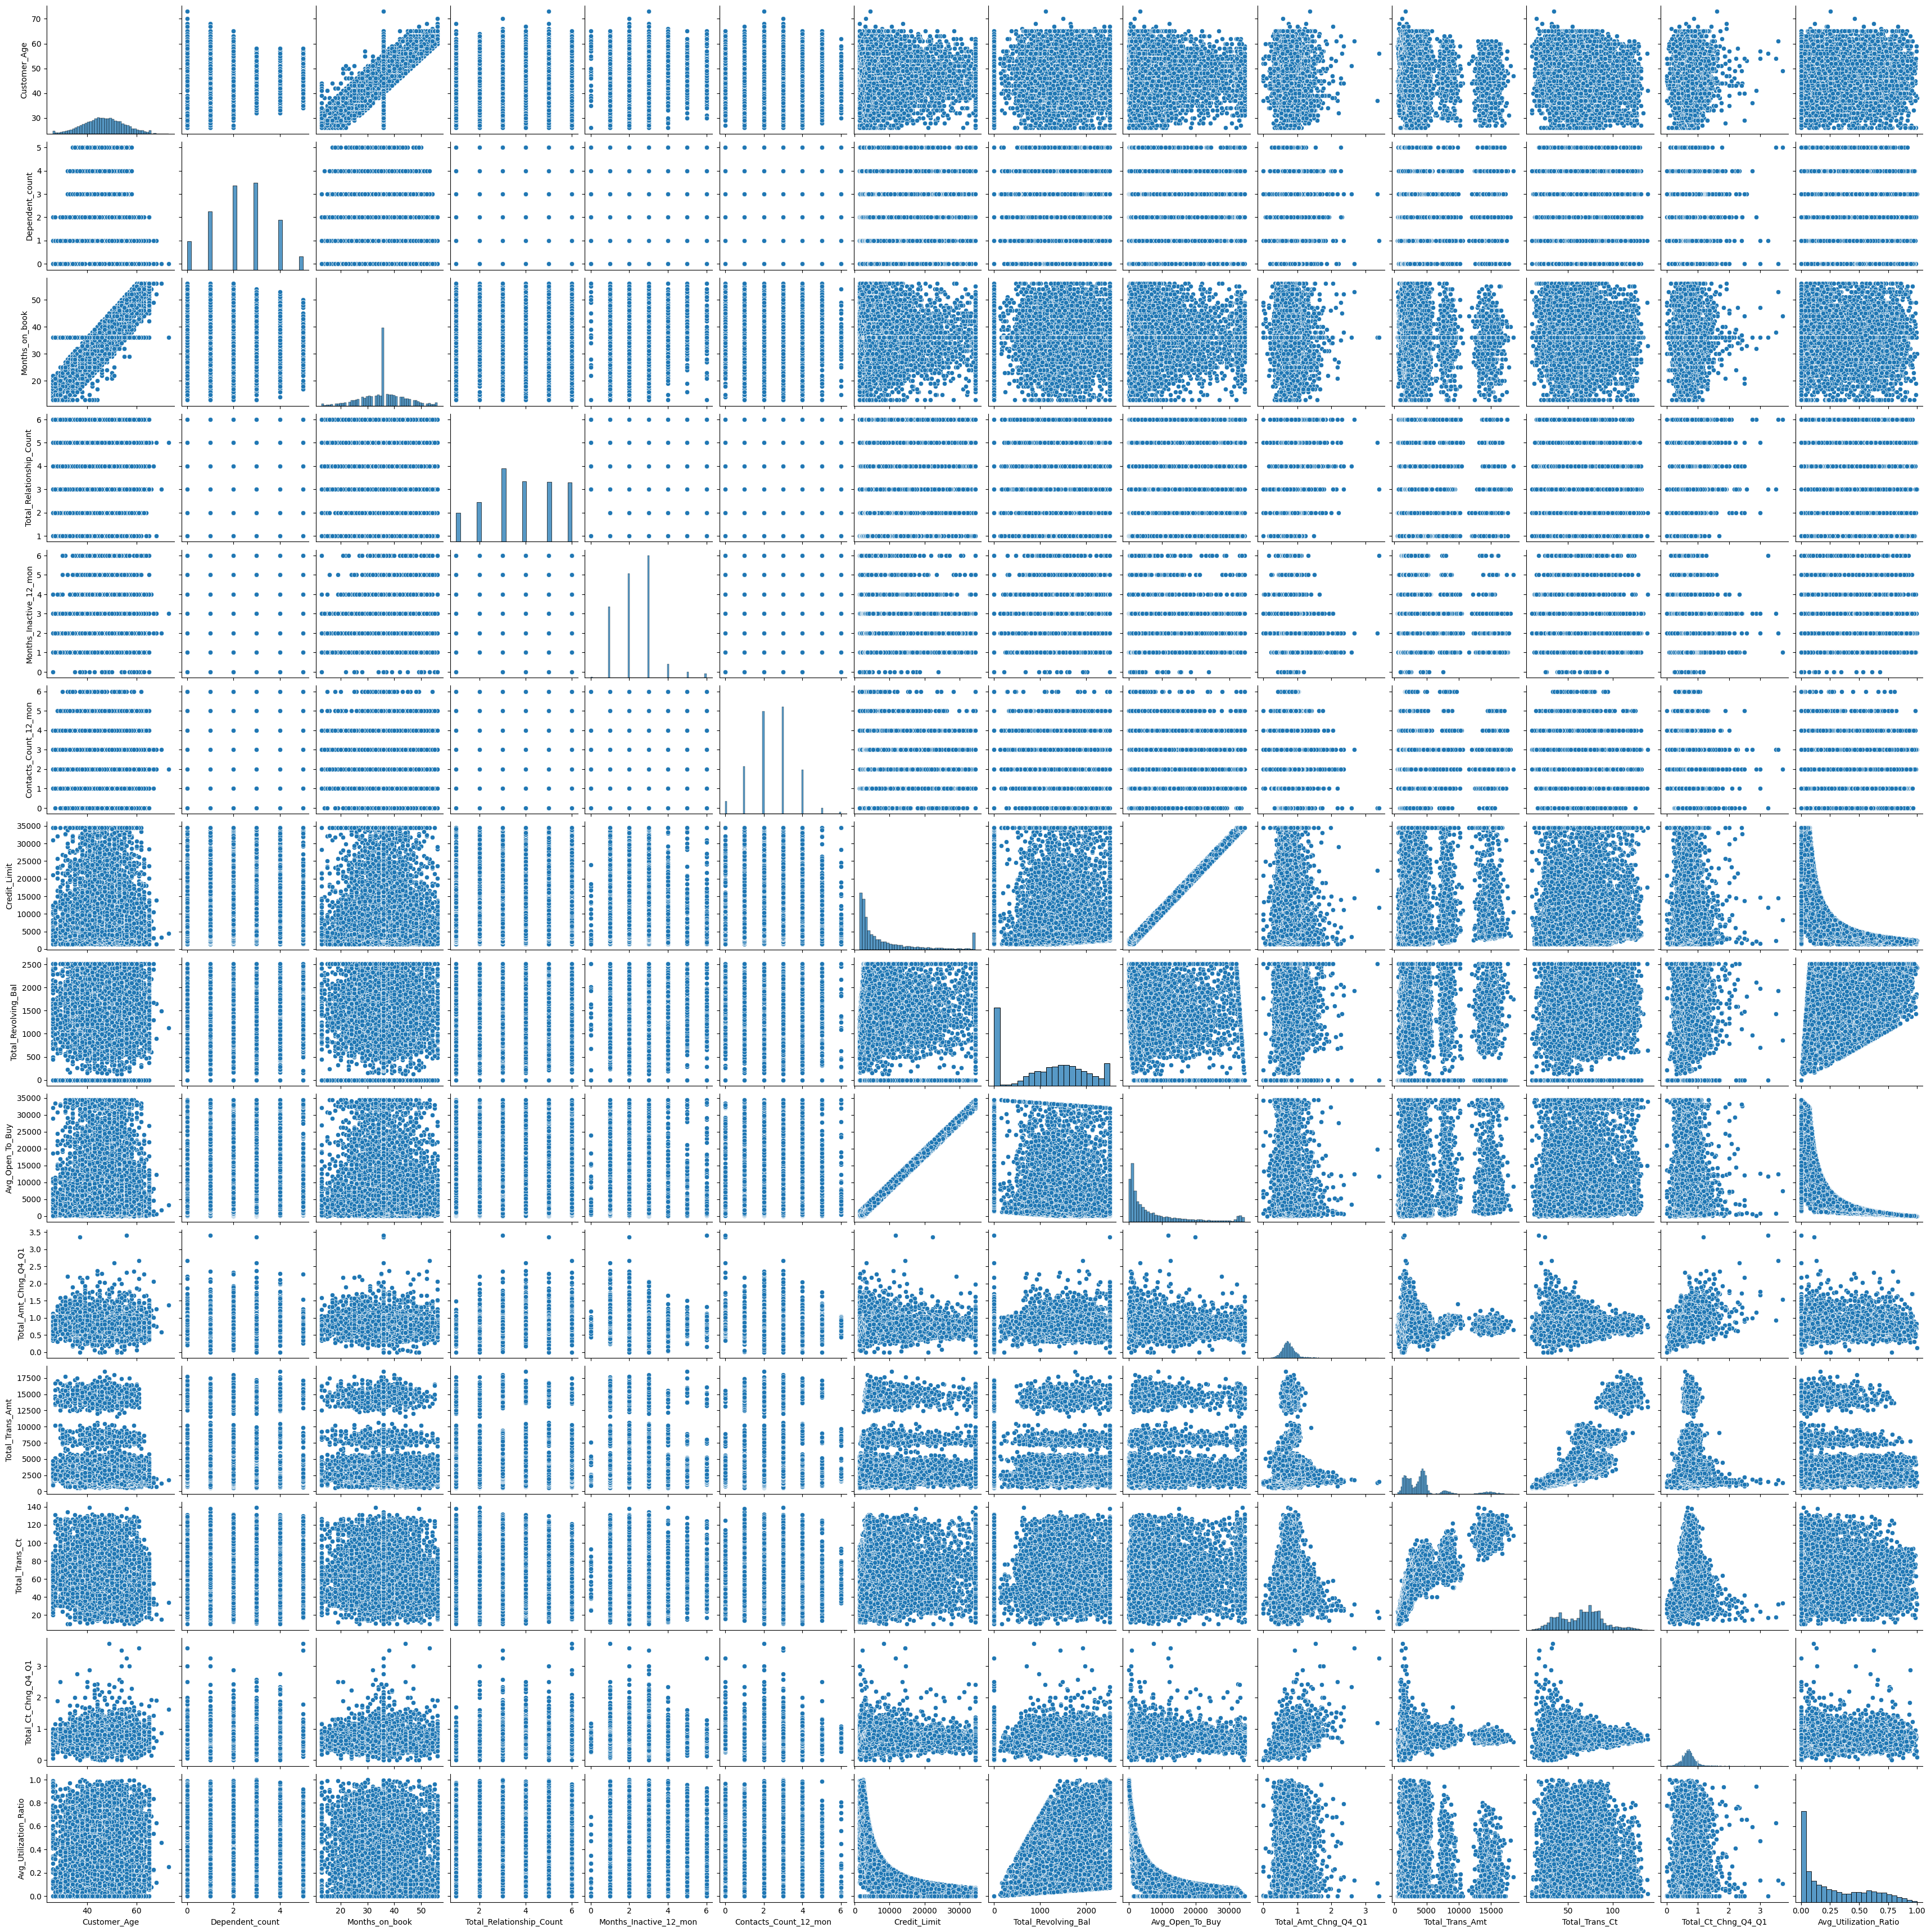

In [24]:
sns.pairplot(data = data)

plt.show()

- **Nhận xét**:
  - Biểu đồ scatter của 2 cặp thuộc tính `Avg_Utilization_Ratio - Credit_Limit` và `Avg_Utilization_Ratio - Avg_Open_To_Buy` cho thấy mối tương quan phi tuyến giữa các thuộc tính khi chúng có hình dạng của hàm mũ.

#### Các cột dữ liệu dạng phân loại (category)

In [13]:
cate_cols = []